# Time Series Anomaly Detection using Keras

## Fionn McCarthy - G00301126

<hr style="border-top: 1px solid #001a79;" />

## Introduction 
In this notebook I will run through the Keras Timeseries anomaly detection notebook https://github.com/keras-team/keras-io/blob/master/examples/timeseries/timeseries_anomaly_detection.py . I will explore the same concepts used in this notebok with the hope to give a more in-depth understanding of the topic and the terminologies and methods used in the notebook. This jupyter notebook will look at how a reconstruction convolutional autoencoder model can be used in order to detect anomalies in timeseries data. I aim to break down teh process being followed on the process website along with trying to explain what each section of code is trying to do. 

### Tensorflow and Keras
It is important to first understand what a tensor is as it will be one of the main types of data used in this notewbook. A tensor is just like a data container with a certain number of dimensions which enables us to describe the mathematical relationship between these different tensors. Tensors also include descriptions of the valid linear transformations between tensors https://www.kdnuggets.com/2018/05/wtf-tensor.html. The tensor is often referred to as the matrice of N-dimensional space https://www.kdnuggets.com/2018/05/wtf-tensor.html.
<br> 
![SNOWFALL](images/scalar-vector-matrix-tensor.png)
<br> 
https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/
<br> 
When it comes to neural networks and machine learning these tensors can represent the transformation of the input data which will then enable to get our desired output data for this purpose. 


### Time Series Anomaly Detection
An anomaly is "something that deviates from what is standard, normal, or expected" https://www.merriam-webster.com/dictionary/anomaly. Anomalies within a time series dataset are the peaks/spikes or drops/troughs within the data, so we can say that anomaly detection is the process of highlighitng these anomalies in the dataset https://www.section.io/engineering-education/anomaly-detection-model-on-time-series-data-using-isolation-forest/#:~:text=Anomalies%20are%20spikes%20or%20drops,train%20a%20time%20series%20model. When forecasting on a dataset it is thses anomalies within the dataset that can cause issues or skew results when running forecasts on the data. 

Background...

### Machine Learning
Background to machine learning.. research

### Neural Networks
Background..




<hr style="border-top: 1px solid #001a79;" />

## The Dataset
As per the the documentation on the Keras website at https://keras.io/examples/timeseries/timeseries_anomaly_detection/ we will use the Numenta Anomaly Benchmark (NAB) dataset for the purpose of this analysis. One dataset will be used initially to train the model and then a second dataset will be used to evaluate and test our model, these datasets are the art_daily_small_noise.csv file and the art_daily_jumpsup.csv file respectively. 

The Numenta Anomaly Benchmark (NAB) is a unique gauge for evaluating algorithms for anomaly detection in for use in applications. There are over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. The data is all open-source and has a lot documentation to go with and has another link to a github page which hosts information on a scoreboard of anomaly detection algorithms. This can be accessed at the following link github.com/numenta/NAB. This repository provides in-depth detail on evaluation of anomaly detection algorithsm with the Numenta Anomaly Benchmark.

Both datasets used in this notebook have been generated artificially, one with anomalies and one without anomalies. It is time series data and has two variables the timestamp and the value for that point in time. We have a value for every 5 mins over a 14 day period.


<br> 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
 <br>

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

#Layers of Neural Networks
from tensorflow.keras import layers 

# Plotting
import matplotlib.pyplot as plt

<hr style="border-top: 1px solid #001a79;" />

### Loading the Data
Accessing the data and then loading it for use in the notebook. 

<hr style="border-top: 1px solid #001a79;" />

I will bring in the datasets which I discussed above previously. 

Below is the url to access both the csv files online and full link to bring in both the datasets I will use in this notebook. 




In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

<hr style="border-top: 1px solid #001a79;" />

### Exploring the Data

<hr style="border-top: 1px solid #001a79;" />


In [3]:
# creating dataframe with no anomaly data
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [4]:
# quick look at data
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [5]:
# exploring the data
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [6]:
# looking at first row
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [7]:
# first value
df_small_noise.iloc[0]['value']

18.3249185392

In [8]:
# first value
df_small_noise.iloc[0].values[0]

18.3249185392

Visualize the data
Timeseries data without anomalies
We will use the following data for training.

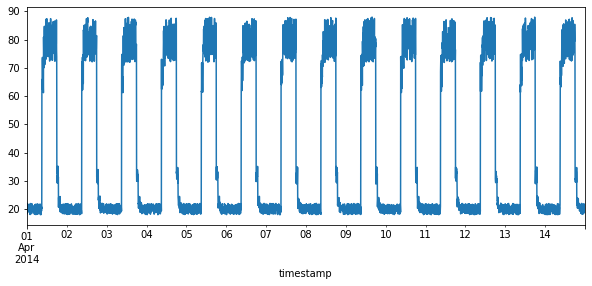

In [9]:
# defining axes
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

Timeseries data with anomalies
We will use the following data for testing and see if the sudden jump up in the data is detected as an anomaly.

In [10]:
# creating dataframe with anomaly data, setting the timestamp as teh index column
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [11]:
# quick look at data 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [12]:
# exploring data quickly
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [13]:
# first value
df_daily_jumpsup.iloc[0]['value']

19.761251903

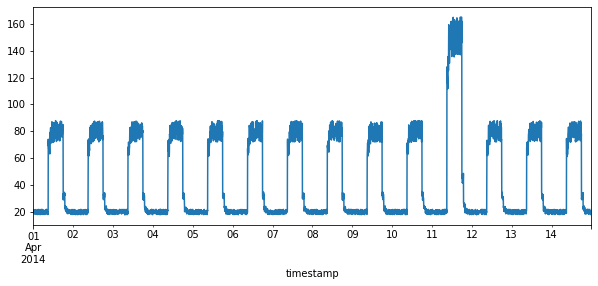

In [14]:
# defining axes
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

<hr style="border-top: 1px solid #001a79;" />

### Pre-processing

<hr style="border-top: 1px solid #001a79;" />

Pre-pocessing is required in order to prepare the data to be inserted into the neural network. I will first carry out some pre-processing task on the data in order to prepare the data for this analysis. This is essentially a data cleansing and processing technique used on data before we carry out machine learning techniques on the data. Most common techniques used in this area are standardising the data values or normalising the data values. Another way is by transsofmring the data. 

#### Normalising the data
We will first look at whether we should standardise or normalise the data values. In order to see which route we take we need to plot the data, having plotted the data above previous we have already carried out this part of the process. 

The distribution of this data will dictate whether to normalise or standardise the data https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed. If the data follows a Gaussian distribution, which is bell-curved data when plotted then you would satndardise the data. As the data does not follow this distribution we need to normalise the data. 

Normalising the data involves scaling the data, in order to achieve this we will get the mean and standard of the values and the following formula will give us our normaliused values: 

$$ Z = {x - \mu \over \sigma} $$

I will apply this to the values prior to moving to the next stage of the analysis. 

In [15]:
# gettign the mean of the values
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [16]:
# geting the standard deviation of the values
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [17]:
# normalising the values 
df_train_vals = (df_small_noise - train_mean) / train_std

# quick look at values outputted
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


With this technique complete we will do a quick check to see the mean is almost zero and that the standard deviation is near 1. 

In [18]:
# check mean
df_train_vals['value'].mean()

-2.616541242931684e-15

In [19]:
# check standard deviation
df_train_vals['value'].std()

1.0000000000000018

In [20]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [21]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [22]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

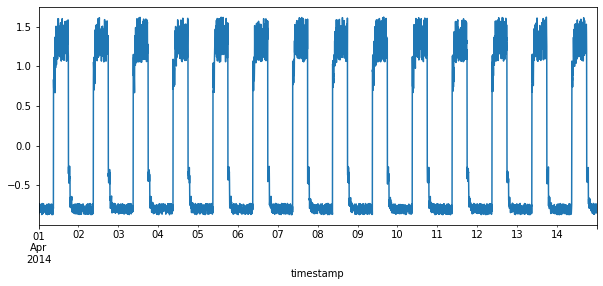

In [23]:
# defining our plot
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

#### Transforming the data
In this section we will look at ways to tarnsform the data, in the notebook they use the method of windows in order to do this or as they refer to 'time steps'. This involves paritioning the data into different subsections in order top slide the window along the data to predict the next section of the data. The method of utilising previous time steps to forecast the next time step in the series https://machinelearningmastery.com/time-series-forecasting-supervised-learning/#:~:text=The%20use%20of%20prior%20time,or%20size%20of%20the%20lag. . 

In [1]:
# Looking at dataset shape, number of values, 4032 rows in dataset
df_train_vals.shape

NameError: name 'df_train_vals' is not defined

In [25]:
# number of time steps in the data or window size
window_size = 288

In [26]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [27]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [28]:
# Remove brackets.
len(L) - win_size + 1

10

In [29]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [30]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [31]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [32]:
# defining windows formula
def windows(vals, N=window_size):
  # set L to be an empty list
  L = []
  # loop through data
  for i in range(len(vals) - N + 1):
    # append winodw to the list
    L.append(vals[i:i+N])
  # stack() is used to stack our windows on top of one another
  return np.stack(L)

In [33]:
# create windows from df_train_vals data
x_train = windows(df_train_vals)
# print first value in first window and last value last window
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [34]:
# check against first and last value in initial values
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [35]:
x_train

array([[[-0.85882857],
        [-0.72899302],
        [-0.84814772],
        ...,
        [-0.86453747],
        [-0.81250829],
        [-0.79671155]],

       [[-0.72899302],
        [-0.84814772],
        [-0.72958579],
        ...,
        [-0.81250829],
        [-0.79671155],
        [-0.78767946]],

       [[-0.84814772],
        [-0.72958579],
        [-0.731173  ],
        ...,
        [-0.79671155],
        [-0.78767946],
        [-0.73706287]],

       ...,

       [[-0.8226548 ],
        [-0.86660975],
        [-0.82181363],
        ...,
        [-0.79164661],
        [-0.78025492],
        [-0.83364049]],

       [[-0.86660975],
        [-0.82181363],
        [-0.75595835],
        ...,
        [-0.78025492],
        [-0.83364049],
        [-0.73510213]],

       [[-0.82181363],
        [-0.75595835],
        [-0.74256753],
        ...,
        [-0.83364049],
        [-0.73510213],
        [-0.8460886 ]]])

In [36]:
# shape of data made up of 288 windows of 3745 training examples
x_train.shape

(3745, 288, 1)

We now have slid the window across these values and ended up with 3,745 windows with 288 values in each window. 

In [37]:
# array vof values
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [38]:
# first window in training data flattened
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

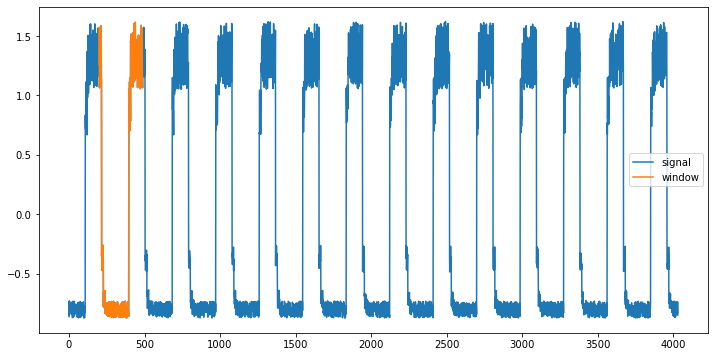

In [39]:
# picking a window in the data
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

<hr style="border-top: 1px solid #001a79;" />

### Neural Network

<hr style="border-top: 1px solid #001a79;" />

In [40]:
# mode will take input in the shape of (batch_size, sequence_length, num_features)
x_train.shape

(3745, 288, 1)

In [41]:
#
layers = [
  # brings the initial data into the system for further processing
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  # apply sliding convolutional filters to 1-D input to help extract needed output, 32 filters
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # helps with overfitting randomly sets input units to 0 with a frequency of rate at each step during training time
  keras.layers.Dropout(rate=0.2),
  # apply sliding convolutional filters to 1-D input to help extract needed output, 16 filters
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # apply sliding convolutional filters tarsnsposed to 1-D input to help extract needed output, 16 filters
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]


# arranging the keras model in a sequential order  
model = keras.Sequential(layers)


# algorithm for stochastic gradient descent for training deep learning models
optimizer = keras.optimizers.Adam(learning_rate=0.001)


# defining the loss function, the optimizer and the metrics
model.compile(optimizer=optimizer, loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

The fit method is then used to train the data for a fixed number of iterations on the data https://keras.io/api/models/model_training_apis/. 

In the code we the Keras example has input the same training data with 288 windows of data for the input variable and the output variable, the reaosn this is done is because the datset used to train this data has no anomalies in it and it is a reconstruction model. The epochs have been set to 50 in order to iterate over the data 50 time sin order to come to the final model. The batch size argument will split the data into batches, dependind on the number it is set to. Here the data is split into 128 batches. 

The validation_split argument sets the fraction of the data to be split and taken out from the trianing of the model, so here 0.2 is used. Therefore 20% of the data will be used for validation, so whne the model has comeplted each epoch it will iterate over the validation dataset and compute the validation loss and validation metrics.

Callbacks are another argument used in the model fit which are objects that are called at different points in the training to see if the model is improving, here the EarlyStopping callback is used. In this case it is implemented that mode has been set to 'min' meaning that if the quantity monitored of the validation loss ('val_loss') has stopped decreasing then the training will stop. The patience argument in the callback sets a limit, so if there no improvements within 5 epochs the model will stop training https://keras.io/api/callbacks/early_stopping/. These callbacks are called at different points in the training, e.g. at the start of an epoch, at the end of a batch, at the end of an epoch, etc https://keras.io/api/callbacks/early_stopping/.


In [42]:
# buidling the model, fitting the model to the data
# input and ouput data is same here as this data has no anomlaies in it
# training will stop when the quantity monitored has stopped decreasing
# Stop training when `val_loss` is no longer improving
# 5 epochs without improvement stops training
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 65ms/step - loss: 0.7042 - val_loss: 0.5338
Epoch 2/50
27/27 [==============================] - 1s 49ms/step - loss: 0.2872 - val_loss: 0.0457
Epoch 3/50
27/27 [==============================] - 1s 50ms/step - loss: 0.0653 - val_loss: 0.0404
Epoch 4/50
27/27 [==============================] - 1s 47ms/step - loss: 0.0510 - val_loss: 0.0337
Epoch 5/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0437 - val_loss: 0.0308
Epoch 6/50
27/27 [==============================] - 1s 46ms/step - loss: 0.0389 - val_loss: 0.0292
Epoch 7/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0351 - val_loss: 0.0294
Epoch 8/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0320 - val_loss: 0.0294
Epoch 9/50
27/27 [==============================] - 1s 46ms/step - loss: 0.0295 - val_loss: 0.0301
Epoch 10/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0275 - val_loss: 0.0301
Epoch 11/

<hr style="border-top: 1px solid #001a79;" />

### Evaluation

<hr style="border-top: 1px solid #001a79;" />

The history object is used in order to get the history attribute which will return the loss values and at each of the epochs, it will also tell us the validation loss values and validation metric values when traing and validating the model https://keras.io/api/models/model_training_apis/. 


In [43]:
# training loss vlauers
history.history["loss"]

[0.7042356729507446,
 0.2871636748313904,
 0.06529606133699417,
 0.051024943590164185,
 0.043724801391363144,
 0.038877371698617935,
 0.03511473909020424,
 0.0320085845887661,
 0.029512833803892136,
 0.02751011587679386,
 0.02600990980863571]

In [44]:
history.history["val_loss"]

[0.5338031053543091,
 0.04565222188830376,
 0.04035162180662155,
 0.033650029450654984,
 0.030825866386294365,
 0.02915576659142971,
 0.02943279966711998,
 0.029425954446196556,
 0.030062921345233917,
 0.030140366405248642,
 0.029702240601181984]

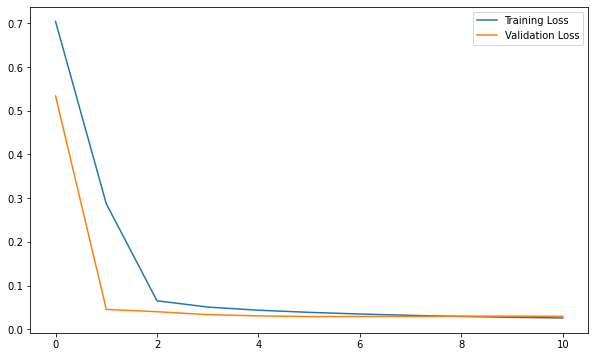

In [45]:
# defining our plot size 
fig, ax = plt.subplots(figsize=(10, 6))

# ploting the training loss values
ax.plot(history.history["loss"], label="Training Loss")

# plotting the validation loss values 
ax.plot(history.history["val_loss"], label="Validation Loss")

# add legend to plot 
ax.legend();

In [46]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 8ms/step


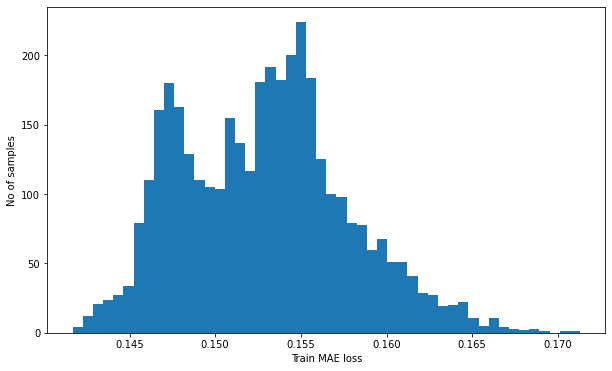

In [47]:
# Calculate mean squared loss
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

# defining our plot size 
fig, ax = plt.subplots(figsize=(10, 6))

# plotting histogram of MAE loss
ax.hist(train_mae_loss, bins=50)

# x label
ax.set_xlabel("Train MAE loss")

# y label
ax.set_ylabel("No of samples");

In [48]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# print it out
threshold

0.17129036072527068

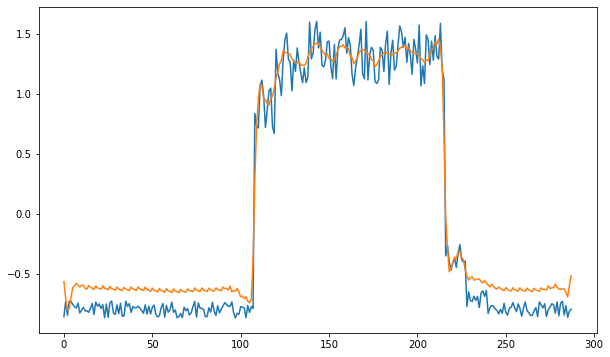

In [49]:
# defining the figure and axes 
fig, ax = plt.subplots(figsize=(10, 6))

# plot first window training data
ax.plot(x_train[0])

# plot first window predicted data
ax.plot(x_train_pred[0]);

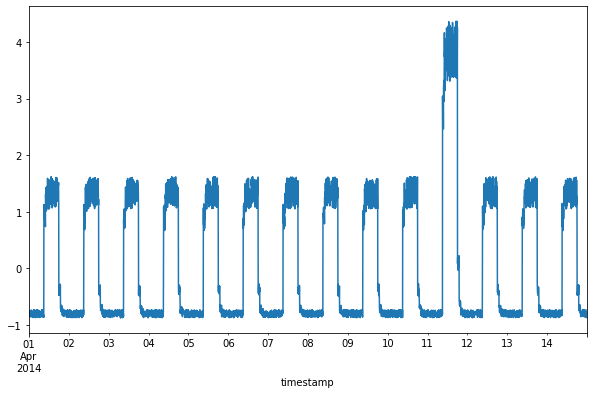

In [50]:
# normalising the values
df_test_value = (df_daily_jumpsup - train_mean) / train_std

# defining figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# plotting the normalised data
df_test_value.plot(legend=False, ax=ax);

In [51]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [52]:
# run the model on the test data
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 8ms/step


Look at what test MAE loss is....







In [53]:
# calculate the mae loss for test data 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss

array([[0.14879488],
       [0.1462622 ],
       [0.15040372],
       ...,
       [0.14749793],
       [0.14670346],
       [0.14505955]])

In [54]:
# format data into a row instead of a column
test_mae_loss = test_mae_loss.reshape((-1))
test_mae_loss

array([0.14879488, 0.1462622 , 0.15040372, ..., 0.14749793, 0.14670346,
       0.14505955])

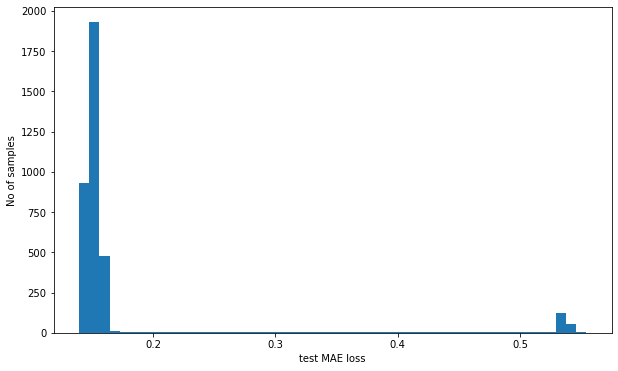

In [55]:
# defining figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# histogram of mae loss data
ax.hist(test_mae_loss, bins=50)

# x label 
ax.set_xlabel("test MAE loss")

# y label
ax.set_ylabel("No of samples");

To find the anomalies in the data, we create the inequality that if the MAE loss is greater than the threshold which was the maximum mae loss for the training data. This is the definition used for the anomaly, the number of these is outputted below. 

In [56]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

392

In [57]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

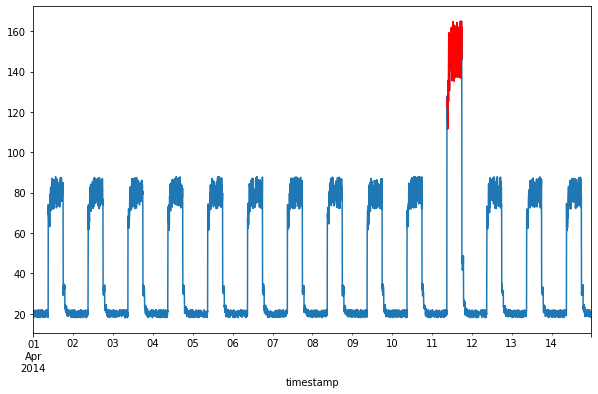

In [58]:
# subset of dataset where there are anaomalies
df_subset = df_daily_jumpsup.iloc[inds]

# defining figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
 
# plot dataset 
df_daily_jumpsup.plot(legend=False, ax=ax)

# plot the anomalies in red on same graph
df_subset.plot(legend=False, ax=ax, color="r");

## References
 1. https://www.kaggle.com/datasets/boltzmannbrain/nab 